In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Read and explore the data

In [3]:
df=pd.read_csv('Bank customer data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


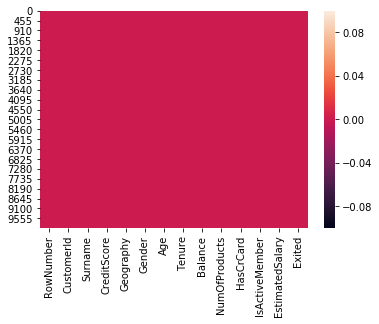

In [4]:
sns.heatmap(df.isnull())
# no null values in the data set

In [95]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


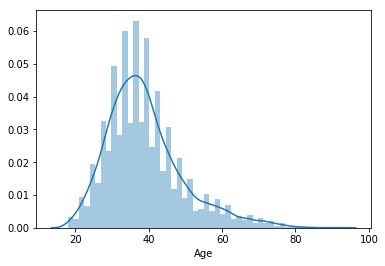

In [9]:
sns.distplot(df['Age'],bins=50)


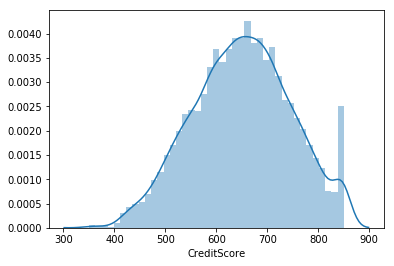

In [10]:
sns.distplot(df['CreditScore'])

In [9]:
df.iloc[3:13] # the rows from 3 to 12

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0


In [10]:
df.iloc[:,3:13].head() # all the rows and from column 4 to 12

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


# Prepare the data

In [4]:
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [5]:
# encoding categorial data (geography and gender)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x_1=LabelEncoder()
# geography has 3 categories, and will change to 0,1,2
# X[:,1] :all the rows and second column
X[:,1]=le_x_1.fit_transform(X[:,1]) 

le_x_2=LabelEncoder()
# gender contain 2 categories, will change to 0,1
# X[:,2]: all the rows and the 3rd column-gender
X[:,2]=le_x_2.fit_transform(X[:,2]) 

# this is better than using d=['':0, '':1...], df[]=d[].map(d).. which i used before

In [6]:
# create dummy varianbles for geography because it contains 3 categories, 
# and need to remove one to prevent falling into the dummie variables trap. (need to do research on this)
# df.get_dummies - this also works, but using dummies will not work on all variables st once

onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()

In [7]:
# remove 1 dummie variable in geography 
# the first 3 columsn are the dummies variables for geography

X=X[:,1:] # exclude the first column

In [8]:
X[0][2]

619.0

In [9]:
X.mean()

16115.853424454546

In [10]:
X.std()

42865.356211821643

In [11]:
(619-16115.853424454546)/42865.356211821643

-0.36152396233163087

In [12]:
# do we need to apply feature scaling in ANN or DP? yes absolutely
# reasons:
# a lot of computations, and need to apply feature scaler to ease these calculations.
# and we dont want to have one independent variable dominate another one

#X(stand) = (X - mean(X))/(stander deviation(x))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [15]:
X[0][2]

-0.32622142203674548

In [16]:
# -0.36152396233163087  and -0.32622142203674548 . prety close

# Train the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


# Start building the ANN. 

In [21]:
import keras
from keras.models import Sequential # use to initialize the neural network
from keras.layers import Dense # create the layers 

In [19]:
# the 7 steps
# 1,dense: (the first step in the lecture notes about 7 steps)
#2, number of nodes =number of independent variables (11)
# 3, activation function (retifier function for the hidden layer and sigmoid function for the output layer)
# 4, and so on

In [21]:
# initialising the ANN
classifier = Sequential()

In [22]:
# add the input layer and the 1st hidden layer
# 6 nodes for the hidden layer= (11+1)/2 :  11 = number of input, and number of out put(y:1). see x_train.shape and y_train.shape
# init=relate to step 1. will make sure the weights are small and close to 0
# activation function for hidden layer = rectifier function(relu). for output layer = sigmoid function
classifier.add(Dense(input_dim=11,units=6,kernel_initializer='uniform', activation='relu'))

In [23]:
# second hidden layer
# the first did not know what to expect, so it need the 11 input nodes
# the second and so on hidden layer know what to expect from the previous one
classifier.add(Dense(units=6,kernel_initializer='uniform', activation='relu'))

In [24]:
# final layer : output layer
# output_dim becmae 1 because it is binary outcome: customer leave or stay
# in order to get the probability of the customer stay or leave, we need to change the activation function to sigmoid
# if the outcome more than classies. output_dim is 3 or more base on the number of that class
# , and activation function is softmax
classifier.add(Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))

In [25]:
# compile the ANN
# the weight is just initilized. now we need to find the best weights that 
# will make the neural network the most powerful (optimizer='adam')

# if the output function is sigmoid which is binary outcome, then the Mclaws function is call 'binary_crossentropy'
# if the outcome is more than 2 categories, it willl be called 'categorical_crossentropy'

# metrics = a criteria that is chosen to evaluate the model
# when the weights are updated after each observation or each batch of many observation. the algorithm uses this accuracy 
# criterion to improve the models performance. when fitting the ANN in to the training sets, the accuracy is going to 
#increase little by little til reach top accuracy. this is because the choose of the 
#accuracy metrics (metrics=['accuracy])
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [26]:
# now fit the ANN to the training set
# tow extra arguments: batch size, we can choose to update the weights either after each obervation passing through
# ANN or after a batch of observations. so, the first one is the batch size.

# the 2: epochs: apply step 1 to 6 over many epochs
# one epoch = one forward pass and one backward pass of all the training examples
# batch size = the number of training examples in one forward/backward pass.
classifier.fit(X_train, y_train, batch_size=10, epochs=50)


Epoch 1/50
8000/8000 [==============================] - 2s 222us/step - loss: 0.4793 - acc: 0.7954
Epoch 2/50
8000/8000 [==============================] - 2s 240us/step - loss: 0.4287 - acc: 0.7960
Epoch 3/50
8000/8000 [==============================] - 2s 225us/step - loss: 0.4233 - acc: 0.7966 0s - loss: 0.4
Epoch 4/50
8000/8000 [==============================] - 2s 213us/step - loss: 0.4192 - acc: 0.8209
Epoch 5/50
8000/8000 [==============================] - 2s 213us/step - loss: 0.4161 - acc: 0.8269
Epoch 6/50
8000/8000 [==============================] - 2s 208us/step - loss: 0.4144 - acc: 0.8289
Epoch 7/50
8000/8000 [==============================] - 2s 213us/step - loss: 0.4130 - acc: 0.8299
Epoch 8/50
8000/8000 [==============================] - 2s 215us/step - loss: 0.4115 - acc: 0.8295
Epoch 9/50
8000/8000 [==============================] - 2s 215us/step - loss: 0.4106 - acc: 0.8335
Epoch 10/50
8000/8000 [==============================] - 2s 205us/step - loss: 0.4099 - acc: 0

# Prediction and evaluation

In [27]:
pred = classifier.predict(X_test)
pred=(pred>0.5) # customer will need the bank

In [28]:
# 1558 = actual left and predicted also left
# 37 = type 1 error. left but predicted not
# 284 trpe 2 error. not left but predicted as left
# 121 not left and predicted also not left

# (1558+121)/2000 = 83%=correct prediction

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(y_test,pred))
print (classification_report(y_test,pred)) # 67% without classifier.fit

[[1536   59]
 [ 262  143]]
             precision    recall  f1-score   support

          0       0.85      0.96      0.91      1595
          1       0.71      0.35      0.47       405

avg / total       0.82      0.84      0.82      2000



# Testing

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
# thiese info need to be in the same order as before
eography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card  Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000

SyntaxError: invalid syntax (<ipython-input-31-f24a51e053be>, line 3)

In [33]:
# the info need to put in a horizontal vector using [[]]. []=verticle
# need to sclae the data like before
New_pred=classifier.predict(sc.transform(np.array([[0.0,0,600,0,40,3,60000,2,1,1,50000]])))

In [34]:
print(New_pred)

[[ 0.17505239]]


In [35]:
New_pred=(New_pred>0.5)
print(New_pred)

[[False]]


In [ ]:
# the customer does not leave the bank. 

# Improve the ANN

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [23]:
# dropout: in each iteration of the training, some neurons of the ANN are randomly being disabled to prevent them from 
# too dependent on each other when they learn the correclation
# randomly disable neurons each iteration means independent correclations- to prevent neuron from learning too much
from keras.layers import Dropout

In [24]:

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(input_dim=11, units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense( units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense( units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])    
    return classifier


In [25]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, nb_epoch=100)

In [26]:
accuracies = cross_val_score(estimator=classifier, X = X_train, y=y_train, cv=10, n_jobs=-1)

Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
800/800 [==============================] - 0s 227us/step
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
800/800 [==============================] - 0s 207us/step
Epoch 1/1
Epoch 1/1
800/800 [==============================] - 0s 178us/step


In [27]:
accuracies

array([ 0.78625   ,  0.79      ,  0.8       ,  0.7825    ,  0.81625   ,
        0.81      ,  0.7875    ,  0.79375   ,  0.79875   ,  0.79499999])

In [28]:
print(accuracies.mean())
# it was 83% before

0.79599999696


In [29]:
accuracies.std()

0.010105690620981692

In [30]:
# Tuning: find the best epoch, batch_size, optimizer.
from sklearn.model_selection import GridSearchCV

In [31]:

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(input_dim=11, units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense( units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense( units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])    
    return classifier

In [32]:
classifier = KerasClassifier(build_fn=build_classifier)

In [33]:
grid_parameters = {'batch_size':[25,32],
                   'nb_epoch':[100,500],
                   'optimizer':['adam', 'rmsprop']
                  }

In [34]:
grid_search = GridSearchCV(estimator=classifier, param_grid=grid_parameters, scoring='accuracy', cv=10)

In [35]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/1
7200/7200 [==============================] - 1s 124us/step - loss: 0.5808 - acc: 0.7949
Epoch 1/1
7200/7200 [==============================] - 1s 137us/step - loss: 0.5654 - acc: 0.7960
Epoch 1/1
7200/7200 [==============================] - 1s 139us/step - loss: 0.5853 - acc: 0.7947
Epoch 1/1
7200/7200 [==============================] - 1s 142us/step - loss: 0.5544 - acc: 0.7979
Epoch 1/1
7200/7200 [==============================] - 1s 140us/step - loss: 0.5998 - acc: 0.7925
Epoch 1/1
7200/7200 [==============================] - 1s 140us/step - loss: 0.5953 - acc: 0.7924
Epoch 1/1
7200/7200 [==============================] - 1s 147us/step - loss: 0.6011 - acc: 0.7953
Epoch 1/1
7200/7200 [==============================] - 1s 151us/step - loss: 0.5561 - acc: 0.7957
Epoch 1/1
7200/7200 [==============================] - 1s 157us/step - loss: 0.5771 - acc: 0.7944
Epoch 1/1
7200/7200 [==============================] - 1s 163us/step - loss: 0.5829 - acc: 0.7958
Epoch 1/1
7200/7200 

In [36]:
print('best parameter: ',grid_search.best_params_)
print('best accuracy: ',grid_search.best_score_)

best parameter:  {'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}
best accuracy:  0.796


In [ ]:
# got worse result. huh. 